## Task: Divide the image into rows

# Imports

In [1]:
import os

import cv2
import numpy as np
import pandas as pd
import math

from skimage import io

from time import strftime

from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Nikhil\anaconda3\envs\ztdl\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


### constants

In [2]:
employee_form_image="sample_data/Employee Feedback Form_1.jpg"
employee_form_image_2="sample_data/Employee Feedback Form_1.jpg"
teacher_form_image="sample_data/Teacher Feedback.jpg"

# Analyze image

### Preprocessing

In [3]:
img = cv2.cvtColor(io.imread(employee_form_image), cv2.COLOR_RGB2BGR)
img.shape

(3300, 2550, 3)

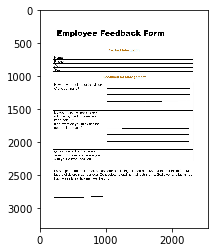

In [4]:
plt.imshow(img, interpolation='nearest')
plt.show()

#### convert to grey scale

In [40]:
img_thr_trunc_inv = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_TRUNC)[1]
img_thr_trunc_inv.shape

(3300, 2550)

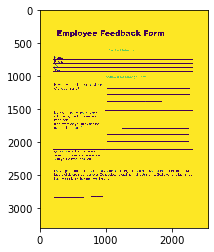

In [41]:
plt.imshow(img_thr_trunc_inv, interpolation='nearest')
plt.show()

### Using gausian blur with OTSU

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_thr = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

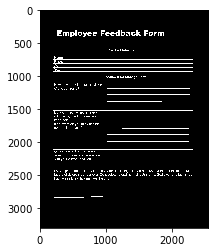

In [13]:
plt.imshow(img_thr, 'gray')
plt.show()

In [14]:
edges = cv2.Canny(gray, 80, 120)
lines = cv2.HoughLinesP(edges, 1, math.pi/2, 2, None, 30, 1);
for line in lines[0]:
    pt1 = (line[0],line[1])
    pt2 = (line[2],line[3])
    cv2.line(img, pt1, pt2, (255,255,255), 3)
cv2.imwrite("temp1.png", img)

True

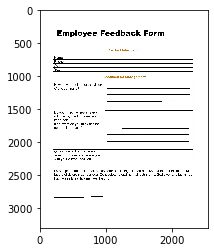

In [22]:
plt.imshow(img, interpolation='nearest')
plt.show()

#### crop image to remove white blocks

In [16]:
coords = cv2.findNonZero(img_thr)
x, y, w, h = cv2.boundingRect(coords) 
rect = img[y:y+h, x:x+w] 
cv2.imwrite("rect.png", rect)

True

In [17]:
cropped_img = cv2.imread("rect.png")

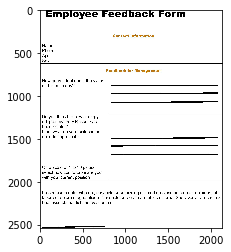

In [20]:
plt.imshow(cropped_img, interpolation='nearest')
plt.show()

In [23]:
gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

In [25]:
img_thr_inv = cv2.threshold(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY), 120, 255, cv2.THRESH_TRUNC)[1]
img_thr_inv.shape

(2537, 2125)

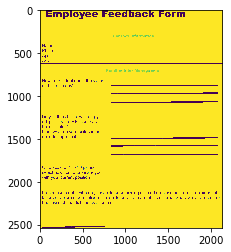

In [26]:
plt.imshow(img_thr_inv, interpolation='nearest')
plt.show()

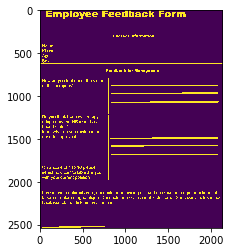

In [27]:
gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9, 9), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
plt.imshow(thresh, interpolation='nearest')
plt.show()

### THRESH_TRUNC

In [42]:
x_sum = np.count_nonzero(img_thr_trunc_inv, axis=1)
x_sum.shape

(3300,)

In [43]:
y = np.arange(x_sum.shape[0])
y.shape

(3300,)

In [44]:
d = {'x': y, 'y': x_sum}
df = pd.DataFrame(data=d)

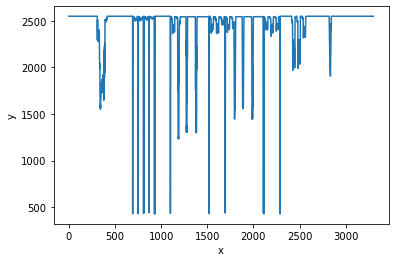

In [45]:
sns.lineplot(data=df,y="y",x="x",palette="flare")

### Thresh

In [36]:
x_sum = np.count_nonzero(thresh, axis=1)
x_sum.shape

(2537,)

In [37]:
y = np.arange(x_sum.shape[0])
y.shape

(2537,)

In [38]:
d = {'x': y, 'y': x_sum}
df = pd.DataFrame(data=d)

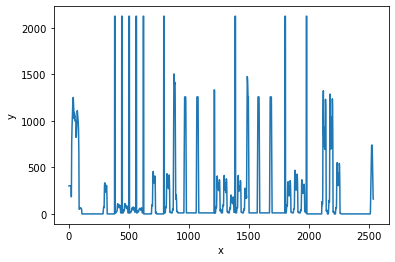

In [39]:
sns.lineplot(data=df,y="y",x="x",palette="flare")

### THRESH_TOZERO_INV

In [32]:
x_sum = np.count_nonzero(img_thr_inv, axis=1)
x_sum.shape

(2537,)

In [33]:
y = np.arange(x_sum.shape[0])
y.shape

(2537,)

In [34]:
d = {'x': y, 'y': x_sum}
df = pd.DataFrame(data=d)

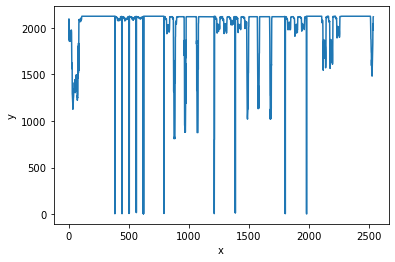

In [35]:
sns.lineplot(data=df,x="x",y="y",palette="flare")